# Sprint 4 — Vis

*Visualizations for the poster.*

1. RMSE per event type (bar chart, time prediction)

In [2]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# Loading and splitting the datasets
df = pd.read_csv('../../outputs.csv')


In [3]:
def rmse(c1, c2):
    err = np.power(np.power((c1-c2), 2).mean(), 0.5)
    return err
    
def MARE(c1, c2):
    return np.power(2, abs(np.log2(c1 + 1) - np.log2(c2 + 1.)).mean())

def MAE(c1, c2):
    return abs(c1 - c2).mean()

def r2(c1, c2):
    return scipy.stats.pearsonr(c1, c2)
def logr2(c1, c2):
    return scipy.stats.pearsonr(np.log10(c1+1), np.log10(c2+1))

def accuracy(c1, c2, df):
    return len(df[c1 == c2])/ len(df) * 100

In [4]:
# Get the most common next event type for the given ev_type
# This function replaces block 10 til 15 (10: "def nth_most_common(w, n):", 15: "next_common_train")
def get_rmse_per_type(df, col, is_baseline):
    df_new = pd.DataFrame()
    event_types = df['concept:name'].unique()
    
    for ev_type in event_types:
        target_rows = df[df['concept:name'] == ev_type]
        new_row = { "type": ev_type, "val": MARE(target_rows[col], target_rows['timedelta']), "baseline": is_baseline }
        df_new = df_new.append(new_row, ignore_index=True)
    
    return df_new


df_rmse_baseline = get_rmse_per_type(df, 'timedelta_baseline', True)
df_rmse_baseline.set_index('type')

df_rmse_nn = get_rmse_per_type(df, 'timedelta_NN_pred', False)
df_rmse_nn.set_index('type')

df_rmse = pd.concat([df_rmse_baseline, df_rmse_nn])

C:\Users\20203477\AppData\Local\Temp\ipykernel_35684\3216948669.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(new_row, ignore_index=True)
C:\Users\20203477\AppData\Local\Temp\ipykernel_35684\3216948669.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(new_row, ignore_index=True)
C:\Users\20203477\AppData\Local\Temp\ipykernel_35684\3216948669.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(new_row, ignore_index=True)
C:\Users\20203477\AppData\Local\Temp\ipykernel_35684\3216948669.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(

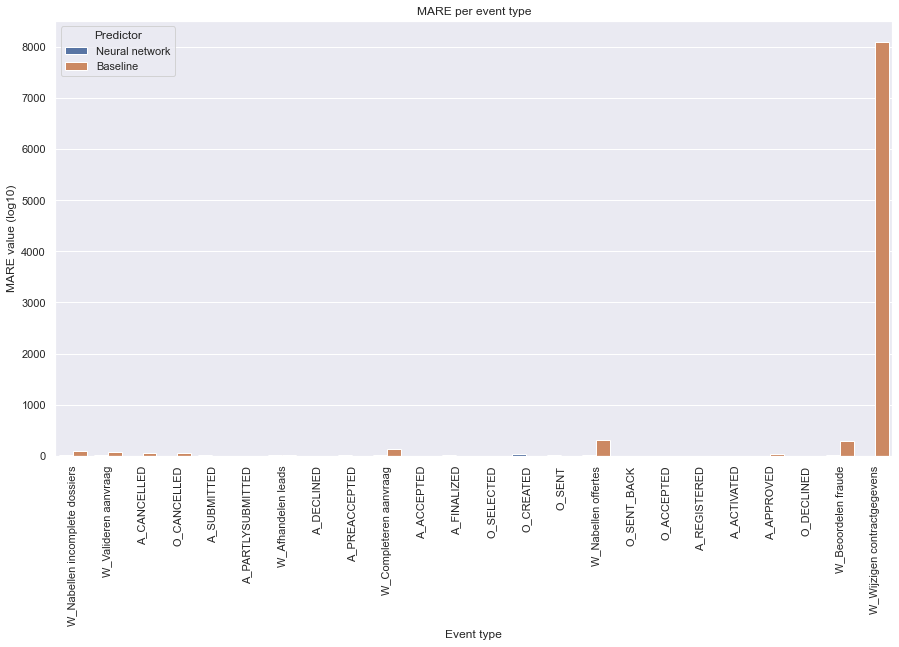

In [5]:
df_vis = df_rmse.copy()

# Calculate logarithm to base 2 on val column
#df_vis['val'] = np.log10(df_rmse['val'] + 1)

# Plot styling
import seaborn as sns
sns.set(rc = {'figure.figsize':(25,15)})


fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(x="type", y="val", data=df_vis, hue="baseline")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("MARE per event type")
ax.set_xlabel('Event type')
ax.set_ylabel('MARE value (log10)')

h, l = ax.get_legend_handles_labels()
labels=["Neural network", "Baseline"]
ax.legend(h, labels, title="Predictor")